In [1]:
# Importar librerias
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import numpy as np

In [4]:
# Cargar Imagen para probar la libreria
!wget https://farm3.staticflickr.com/4102/4899635481_85bb7cecdc_o.jpg
archivo='4899635481_85bb7cecdc_o.jpg'

--2025-04-11 00:21:37--  https://farm3.staticflickr.com/4102/4899635481_85bb7cecdc_o.jpg
Resolving farm3.staticflickr.com (farm3.staticflickr.com)... 18.64.173.84, 2600:9000:2342:a400:0:5a51:64c9:c681, 2600:9000:2342:7e00:0:5a51:64c9:c681, ...
Connecting to farm3.staticflickr.com (farm3.staticflickr.com)|18.64.173.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276448 (270K) [image/jpeg]
Saving to: ‘4899635481_85bb7cecdc_o.jpg.1’

4899635481_85bb7cec 100%[===================>] 269.97K  --.-KB/s    in 0.05s   

2025-04-11 00:21:37 (4.81 MB/s) - ‘4899635481_85bb7cecdc_o.jpg.1’ saved [276448/276448]



Dimensiones de la imagen: (768, 1024, 3)
Tipo de datos: uint8
Tamaño en memoria (bytes): 2359296


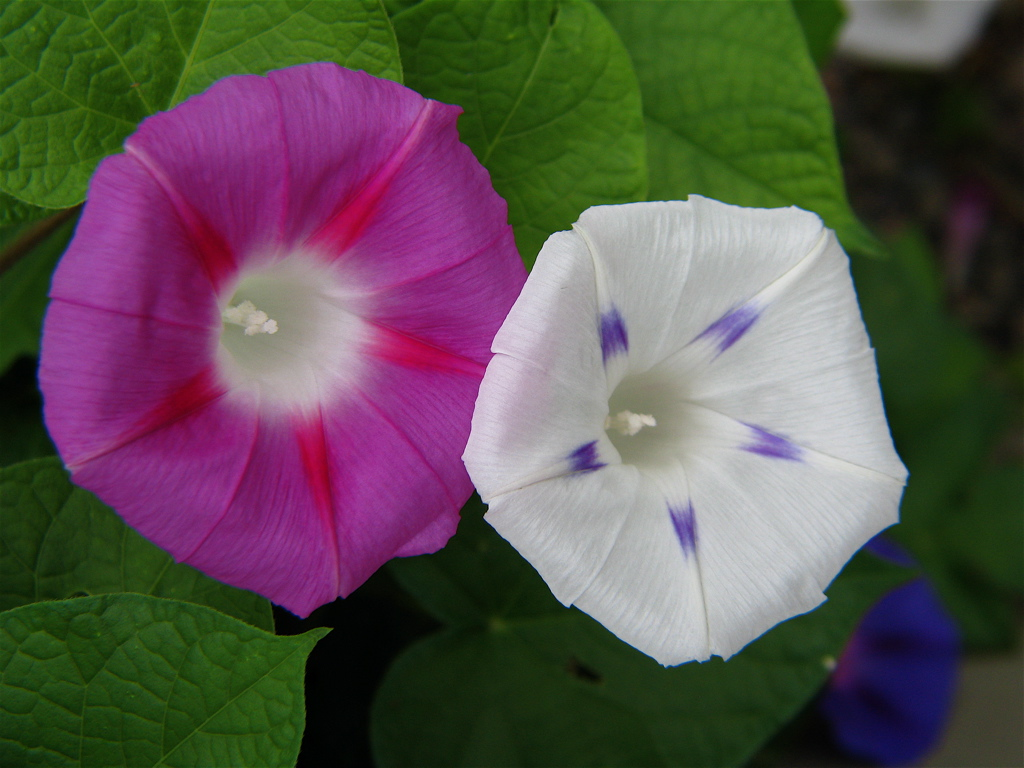

In [5]:
# Lectura de imagen usando OpenCV
imagen_bgr = cv2.imread(archivo)

# Información básica de la imagen
print("Dimensiones de la imagen:", imagen_bgr.shape)
print("Tipo de datos:", imagen_bgr.dtype)
print("Tamaño en memoria (bytes):", imagen_bgr.nbytes)

# Visualización de la imagen completa
cv2_imshow(imagen_bgr)

## Conversión de canales

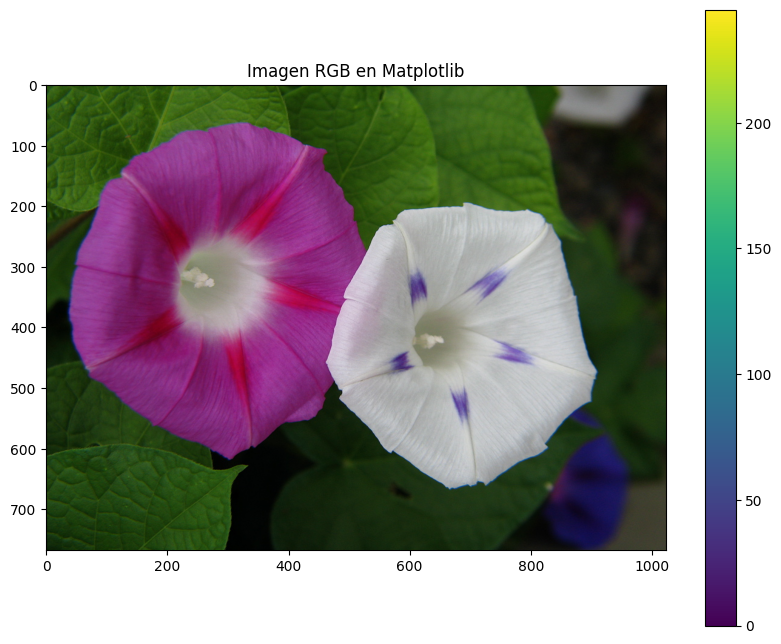

In [6]:
# Lectura y visualización con Matplotlib
imagen_rgb = plt.imread(archivo)
plt.figure(figsize=(10,8))
plt.imshow(imagen_rgb)
plt.title('Imagen RGB en Matplotlib')
plt.axis('on')  # Muestra los ejes para referencia
plt.colorbar()  # Añade barra de color
plt.show()

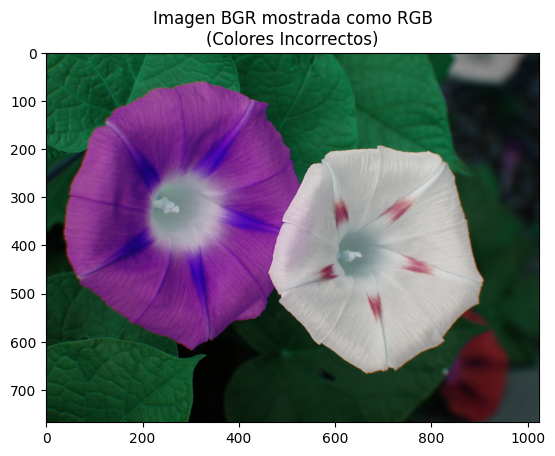

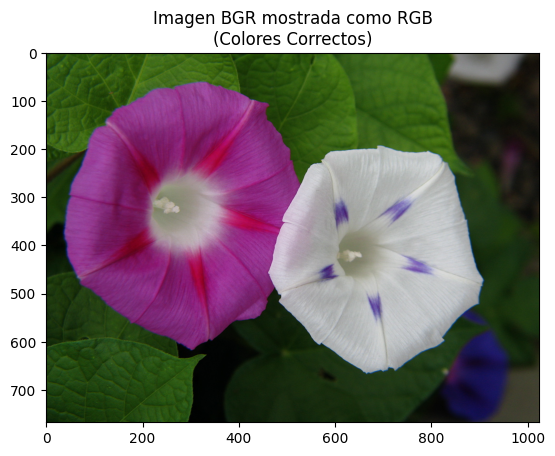

In [9]:
# Demostración de conversión BGR a RGB
imagen_bgr = cv2.imread(archivo)

plt.imshow(imagen_bgr)
plt.title('Imagen BGR mostrada como RGB\n(Colores Incorrectos)')
plt.show()

# Convierto a RGB
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(imagen_rgb)
plt.title('Imagen BGR mostrada como RGB\n(Colores Correctos)')
plt.show()

## Analisis por canales


###############################
    canal red (R)
###############################

Analisis del canal red (R)
 Valor mínimo: 0,
 Valor máximo: 241,
 Promedio: 90.38



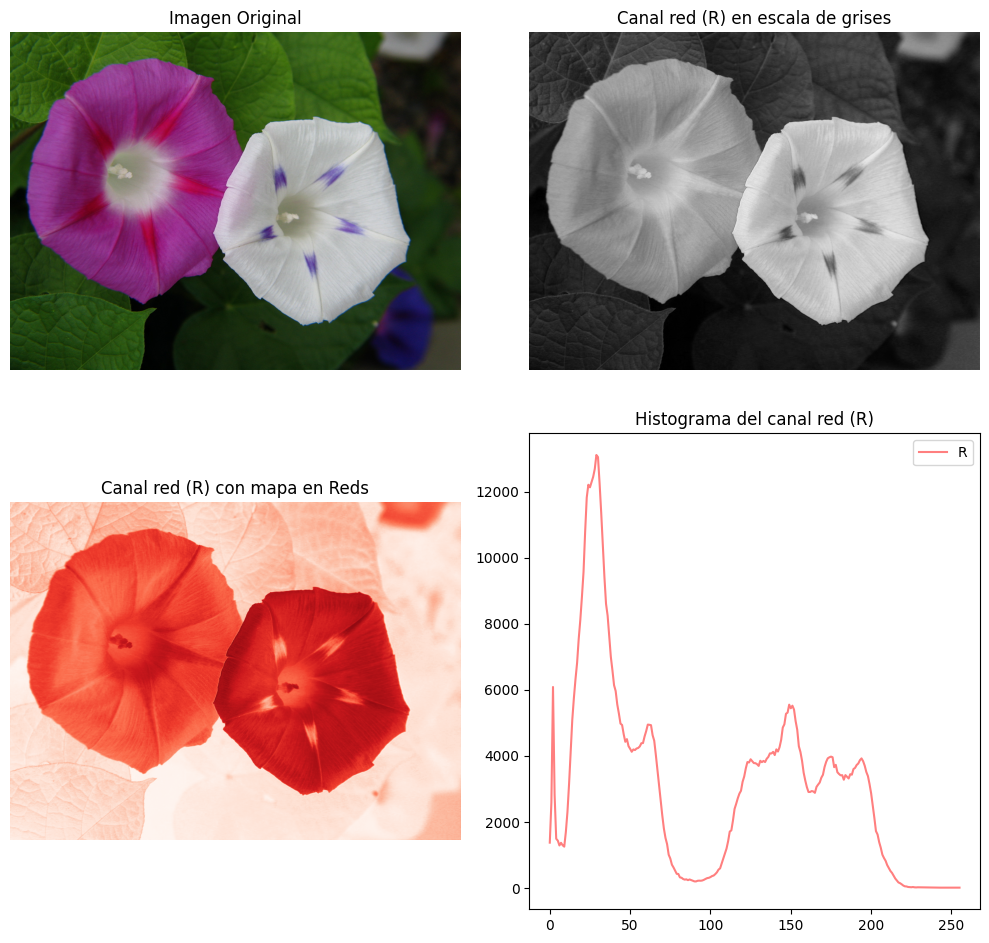


###############################
    canal green (G)
###############################

Analisis del canal green (G)
 Valor mínimo: 0,
 Valor máximo: 245,
 Promedio: 78.37



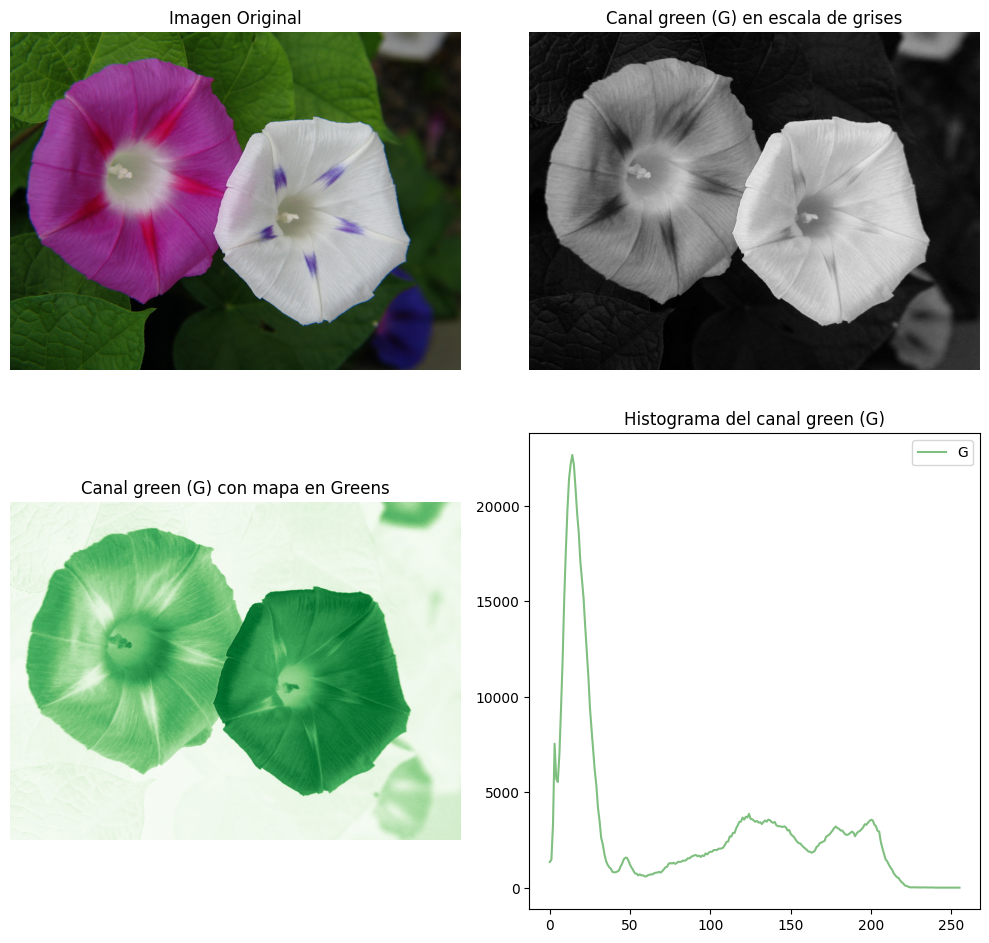


###############################
    canal blue (B)
###############################

Analisis del canal blue (B)
 Valor mínimo: 0,
 Valor máximo: 225,
 Promedio: 81.41



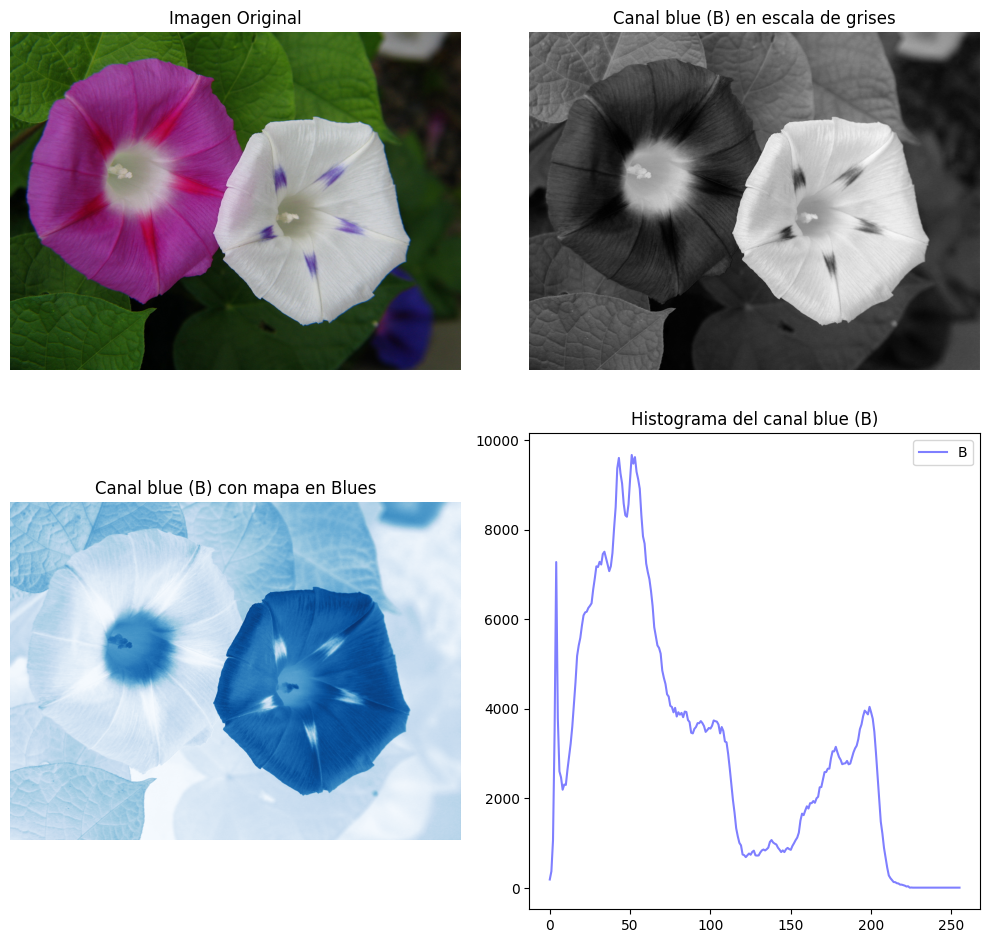

In [17]:
# Extraigo los canales individualmente y los analiso uno por uno
lista_canales = [
    {'nombre':'red','letra':'R','canal':2, 'cmap':'Reds'},
    {'nombre':'green','letra':'G','canal':0, 'cmap':'Greens'},
    {'nombre':'blue','letra':'B','canal':1, 'cmap':'Blues'}
]
for canal in lista_canales:
  print("\n###############################")
  print(f"    canal {canal['nombre']} ({canal['letra']})")
  print("###############################\n")
  actual=imagen_bgr[:,:,canal['canal']]
  print(f"Analisis del canal {canal['nombre']} ({canal['letra']})")
  print(f" Valor mínimo: {actual.min()},\n Valor máximo: {actual.max()},\n Promedio: {actual.mean():.2f}\n")
  fig, axes = plt.subplots(2, 2, figsize=(10, 10))
  axes[0, 0].imshow(imagen_rgb)
  axes[0, 0].set_title('Imagen Original')
  axes[0,0].axis('off')
  axes[0, 1].imshow(actual, cmap='gray')
  axes[0, 1].set_title(f"Canal {canal['nombre']} ({canal['letra']}) en escala de grises")
  axes[0,1].axis('off')
  axes[1, 0].imshow(actual, cmap=canal['cmap'])
  axes[1, 0].set_title(f"Canal {canal['nombre']} ({canal['letra']}) con mapa en {canal['cmap']}")
  axes[1, 0].axis('off')
  axes[1, 1].set_title(f"Histograma del canal {canal['nombre']} ({canal['letra']})")

  # Calculo el histograma
  histograma, binds = np.histogram(actual, bins=256, range=(0, 256))
  axes[1, 1].plot(binds[:-1], histograma, color=canal['nombre'], label=canal['letra'], alpha=0.5)
  axes[1, 1].legend()  # Muestra la leyenda para identificar cada histograma
  axes[1, 1].axis('on')

  plt.tight_layout()
  plt.show()